<a href="https://colab.research.google.com/github/negia7265/Machine_Learning/blob/main/HandWrittenFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import cv2
import os
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Activation, Dense,Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [ ]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [ ]:

model=Sequential([
    Flatten(input_shape=(28,28)),
    Dense(units=128,activation='relu'),
    Dense(units=128,activation='relu'),
    Dense(units=128,activation='relu'),
    Dense(units=128,activation='relu'),
    Dense(units=10,activation='softmax'),
   ])

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=5)

In [ ]:
loss,acurracy=model.evaluate(x_test,y_test)
print(loss)
print(acurracy)

In [ ]:
img=cv2.imread("hand5.png")
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Resize the image to (28, 28) if necessary
if gray_img.shape != (28, 28):
    gray_img = cv2.resize(gray_img, (28, 28))
gray_img = gray_img[np.newaxis, :, :]
gray_img=gray_img/255;
converted_array = np.where(gray_img == 1, 0, np.where(gray_img == 0, 1, gray_img))
# inverted_img = cv2.bitwise_not(gray_img)
plt.imshow(converted_array[0], cmap='gray')

In [ ]:

prediction=model.predict(converted_array)

1/1 [==============================] - 0s 22ms/step


In [ ]:
ans=np.argmax(prediction[0])
print(ans)

3


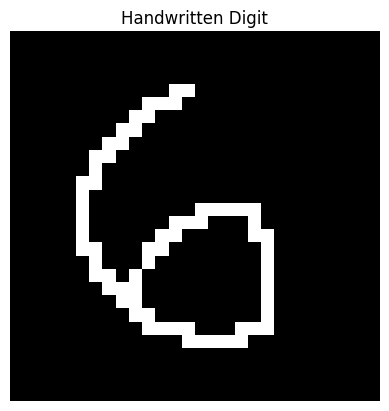

In [ ]:
# plt.imshow(x_test[9], cmap='gray')
plt.imshow(inverted_img[0], cmap='gray')
plt.title("Handwritten Digit")
plt.axis('off')
plt.show()